In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = torch.linspace(0,799,800)

In [ ]:
x

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [ ]:
y = torch.sin(x*2*np.pi/40)

In [ ]:
y

tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
         7.0711e-01,  5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
        -8.7423e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
        -1.0000e+00, -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01,
        -7.0711e-01, -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01,
         1.7485e-07,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
         7.0711e-01,  5.8778e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
        -2.3850e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5

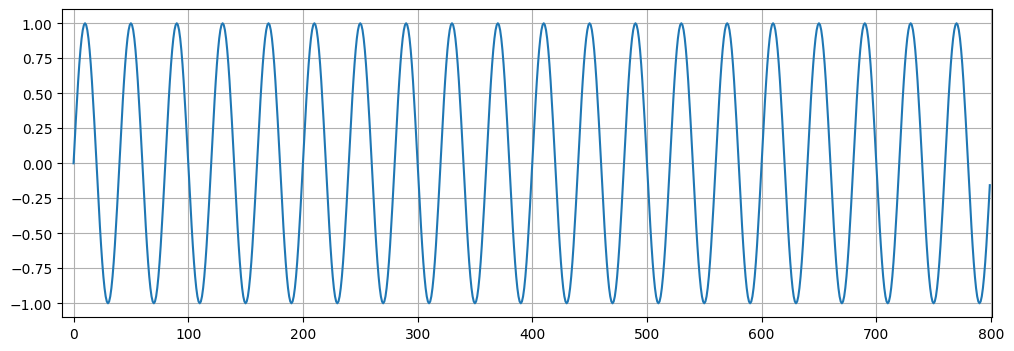

In [ ]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [ ]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

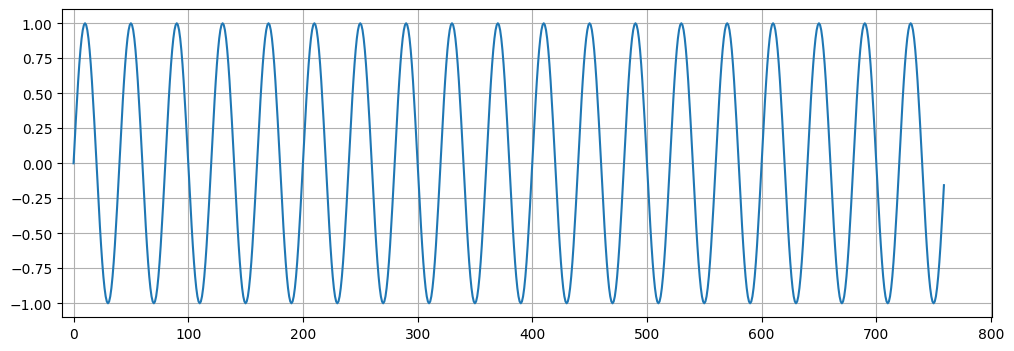

In [ ]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())
# plt.plot(test_set.numpy())

In [ ]:
def input_data(seq,ws):
  out = []
  L = len(seq)
  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))
  return out

In [ ]:
window_size = 40
train_data = input_data(train_set,window_size)

In [ ]:
len(train_data)

720

In [ ]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
          7.0711e-01,  5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
         -8.7423e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01,
         -7.0711e-01, -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01]),
 tensor([1.7485e-07]))

In [ ]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,  7.0711e-01,
          5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01, -8.7423e-08,
         -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01, -7.0711e-01,
         -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01,  1.7485e-07]),
 tensor([0.1564]))

In [ ]:
class LSTM(nn.Module):
  def __init__(self,input_size=1,hidden_size=50,output_size=1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size,hidden_size)
    self.linear = nn.Linear(hidden_size,output_size)
    self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
  def forward(self,seq):
    lstm_out,self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
    pred = self.linear(lstm_out.view(len(seq),-1))
    return pred[-1]

In [ ]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
for p in model.parameters():
  print(p.numel())

200
10000
200
200
50
1


Epoch 1 Loss 0.09209898859262466
Performance on test range: 0.6073052287101746


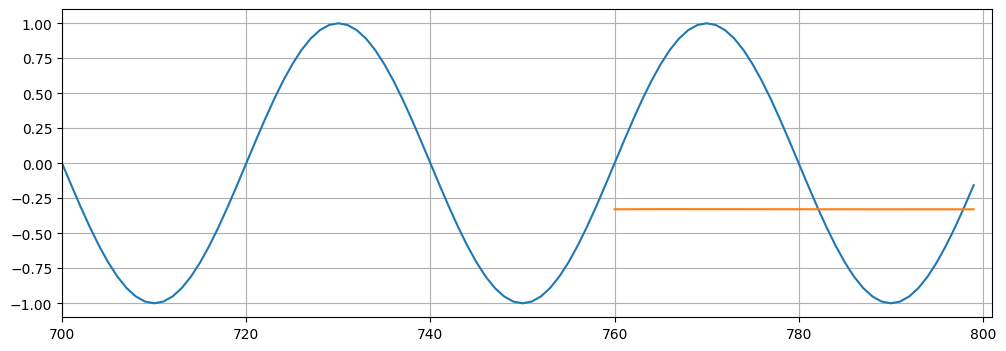

Epoch 2 Loss 0.06505250930786133
Performance on test range: 0.5652278661727905


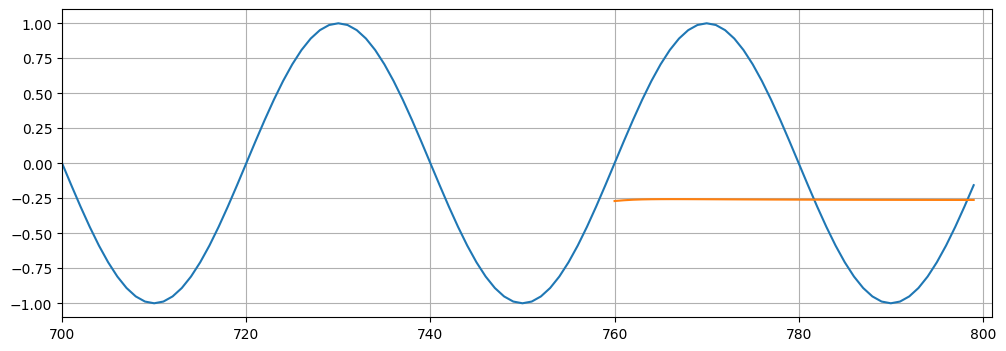

Epoch 3 Loss 0.04197341948747635
Performance on test range: 0.5200703144073486


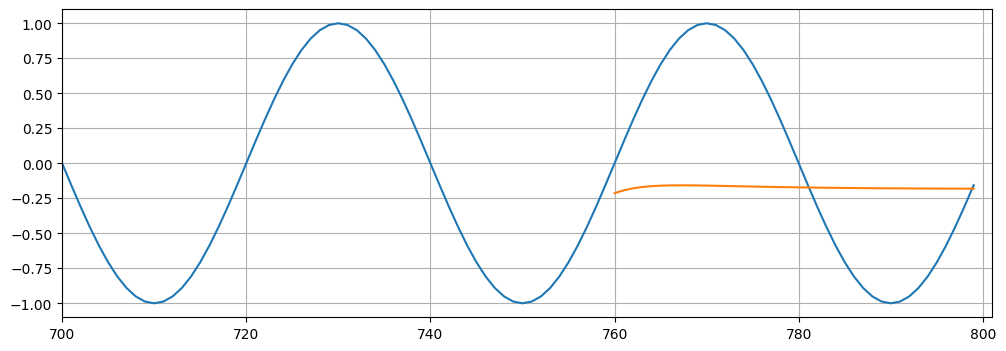

Epoch 4 Loss 0.017842357978224754
Performance on test range: 0.4221588671207428


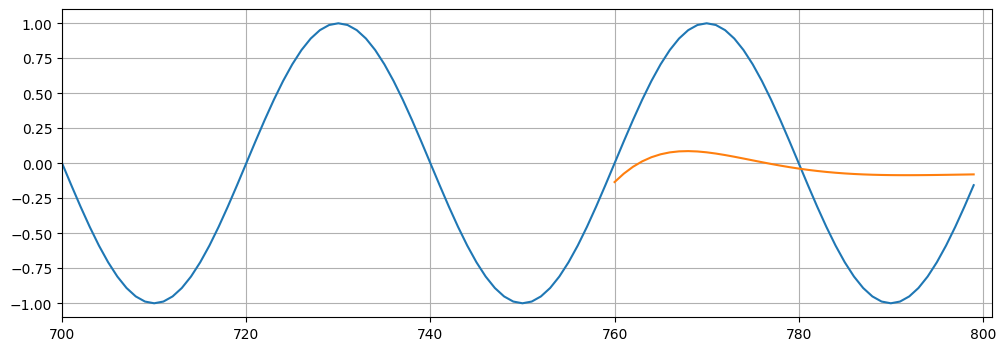

Epoch 5 Loss 0.0028890538960695267
Performance on test range: 0.16624274849891663


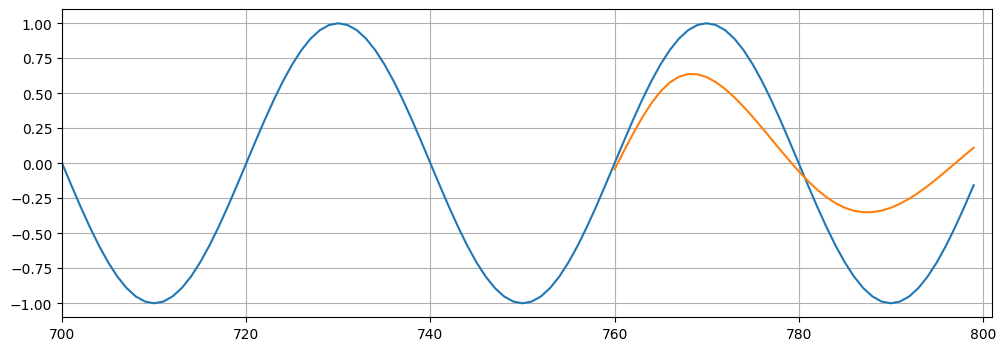

Epoch 6 Loss 0.00032107040169648826
Performance on test range: 0.03055095113813877


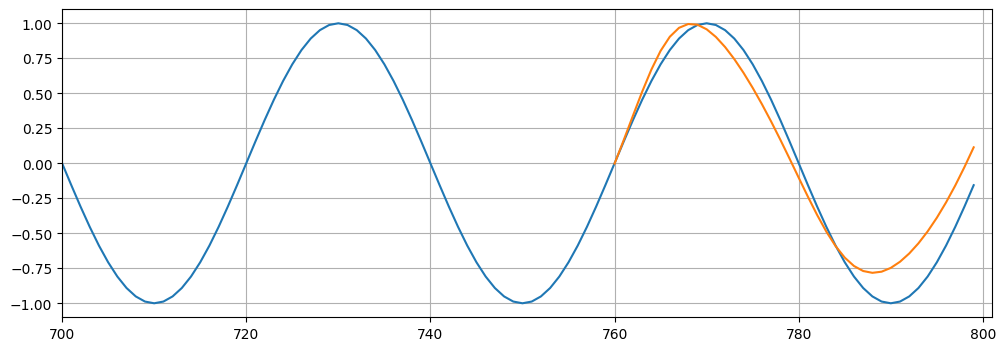

Epoch 7 Loss 0.00013034758740104735
Performance on test range: 0.014989656396210194


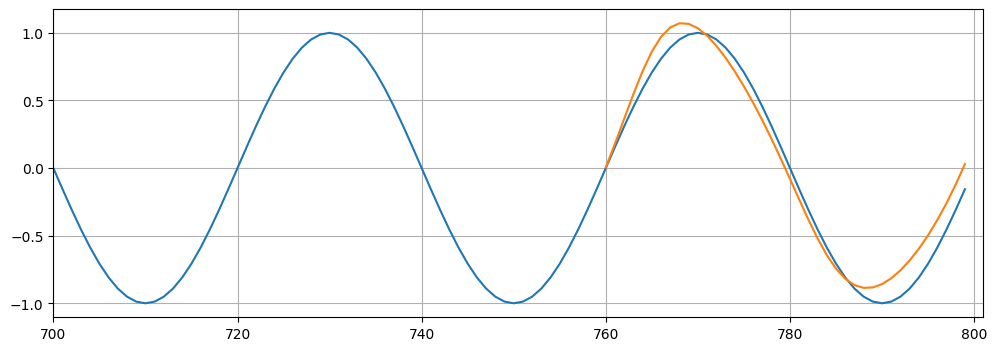

Epoch 8 Loss 0.00012068630894646049
Performance on test range: 0.011856279335916042


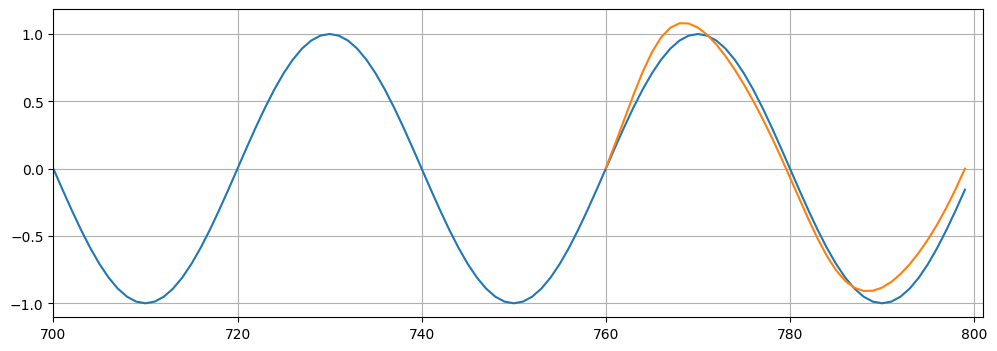

Epoch 9 Loss 0.0001271718501811847
Performance on test range: 0.010163562372326851


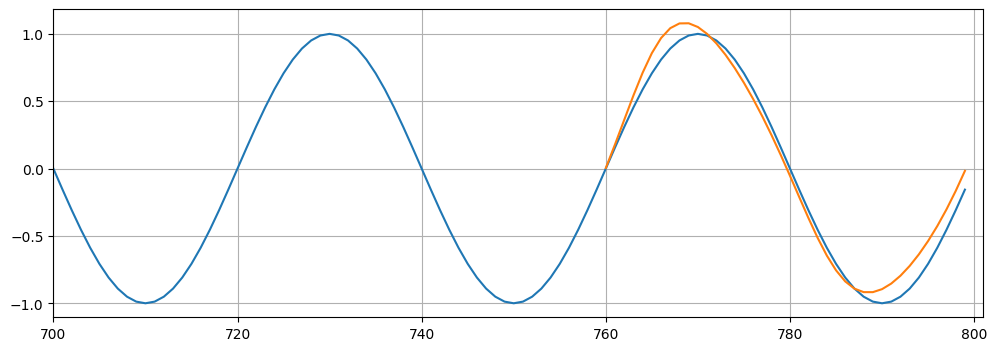

Epoch 10 Loss 0.00013256483362056315
Performance on test range: 0.008897324092686176


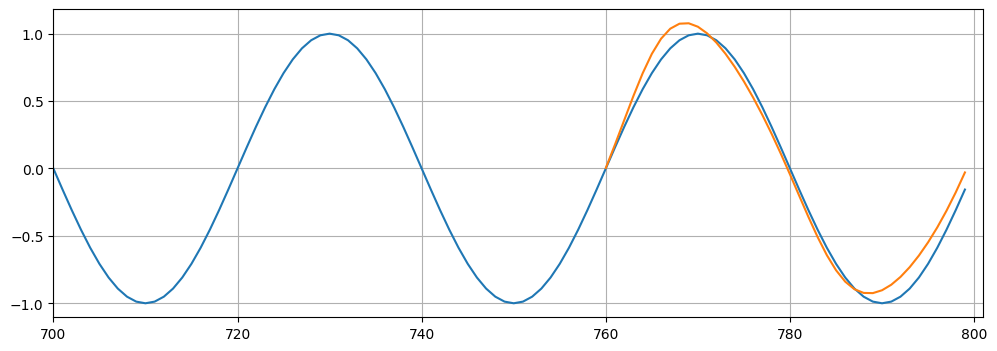

In [ ]:
epochs = 10
future = 40
for i in range(epochs):
  for seq,y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f"Epoch {i+1} Loss {loss.item()}")
  preds = train_set[-window_size:].tolist()
  for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
      model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
      preds.append(model(seq).item())
  loss = criterion(torch.FloatTensor(preds[-window_size:]),y[760:])
  print(f"Performance on test range: {loss}")
  plt.figure(figsize=(12,4))
  plt.xlim(700,801)
  plt.grid(True)
  plt.plot(y.numpy())
  plt.plot(range(760,800),preds[window_size:])
  plt.show()

In [ ]:
epochs = 50
window_size = 40
future = 40
all_data = input_data(y,window_size)
len(all_data)

760

In [ ]:
import time
start_time = time.time()
for i in range(epochs):
  for seq,y_train in all_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f"Epoch {i+1} Loss {loss.item()}")
total_time = time.time() - start_time
print(f"Total time: {total_time/60:.2f} minutes")

Epoch 1 Loss 7.133001781767234e-05
Epoch 2 Loss 6.772211781935766e-05
Epoch 3 Loss 6.435217073885724e-05
Epoch 4 Loss 6.120407488197088e-05
Epoch 5 Loss 5.8268156863050535e-05
Epoch 6 Loss 5.552625225391239e-05
Epoch 7 Loss 5.296704694046639e-05
Epoch 8 Loss 5.0574981287354603e-05
Epoch 9 Loss 4.834111678064801e-05
Epoch 10 Loss 4.6248049329733476e-05
Epoch 11 Loss 4.4290514779277146e-05
Epoch 12 Loss 4.245527452440001e-05
Epoch 13 Loss 4.073168020113371e-05
Epoch 14 Loss 3.9115340769058093e-05
Epoch 15 Loss 3.759456012630835e-05
Epoch 16 Loss 3.616161848185584e-05
Epoch 17 Loss 3.481293606455438e-05
Epoch 18 Loss 3.353991996846162e-05
Epoch 19 Loss 3.233550887671299e-05
Epoch 20 Loss 3.1196384952636436e-05
Epoch 21 Loss 3.0117744245217182e-05
Epoch 22 Loss 2.909600516431965e-05
Epoch 23 Loss 2.8126027245889418e-05
Epoch 24 Loss 2.7202950150240213e-05
Epoch 25 Loss 2.632600262586493e-05
Epoch 26 Loss 2.548989505157806e-05
Epoch 27 Loss 2.4693634259165265e-05
Epoch 28 Loss 2.39344972214

In [ ]:
preds = y[-window_size:].tolist()
for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())

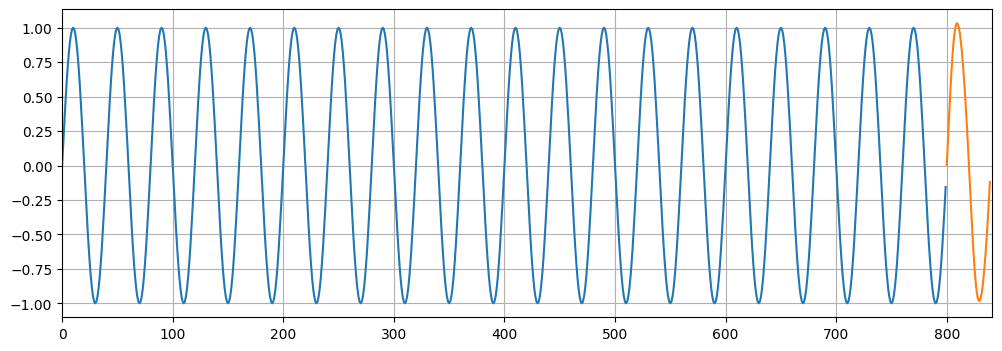

In [ ]:
plt.figure(figsize=(12,4))
plt.xlim(0,841)
plt.grid(True)
plt.plot(y.numpy())
# PLOTTING FORECAST
plt.plot(range(800,800+future),preds[window_size:])
plt.show()